## Random Forest Classifier (Identification)

Class 1: Meghan

Class 2: Gabe

Class 3: Marghece

In [2]:
## Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import cm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report,confusion_matrix,accuracy_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
from datetime import datetime


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Imports
data1 = pd.read_csv('/Users/megha/Desktop/dataSpring2021/Meghan1.txt',sep=',')
data1 = data1.drop(data1.columns[[0,5,6,7,8,9,10,11,12,13,14]],axis=1)

data1_2 = pd.read_csv('/Users/megha/Desktop/dataSpring2021/Meghan2.txt',
                      sep=',',header=4)
data1_2 = data1_2.drop(data1_2.columns[[0,5,6,7,8,9,10,11,12,13,14]],axis=1)




In [6]:
data2 = pd.read_csv('/Users/megha/Desktop/dataSpring2021/Gabe1.txt',
                    sep=',',header=4)
data3 = pd.read_csv('/Users/megha/Desktop/dataSpring2021/Marghece1.txt',
                   sep=',',header=4)

data2 = data2.drop(data2.columns[[0,5,6,7,8,9,10,11,12,13,14]],axis=1)
data3 = data3.drop(data3.columns[[0,5,6,7,8,9,10,11,12,13,14]],axis=1)

data2_2 = pd.read_csv('/Users/megha/Desktop/dataSpring2021/Gabe2.txt',
                    sep=',',header=4)
data2_2 = data2_2.drop(data2_2.columns[[0,5,6,7,8,9,10,11,12,13,14]],axis=1)

data3_2 = pd.read_csv('/Users/megha/Desktop/dataSpring2021/Marghece2.txt',
                    sep=',',header=4)

data3_2 = data3_2.drop(data3_2.columns[[0,5,6,7,8,9,10,11,12,13,14]],axis=1)

print(len(data1_2),len(data2_2),len(data3_2))

4118 4305 4508


### Creating Attribute and Target Sets

The attributes are the 4 channels of the EEG, and the classes are the 3 subjects (Meghan, Gabe, Marghece)

In [10]:
d1c0 = np.hstack((np.array(data1.iloc[0:4435,0]),np.array(data1_2.iloc[0:4117,0])))
d1c1 = np.hstack((np.array(data1.iloc[0:4435,0]),np.array(data1_2.iloc[0:4117,1])))
d1c2 = np.hstack((np.array(data1.iloc[0:4435,0]),np.array(data1_2.iloc[0:4117,2])))
d1c3 = np.hstack((np.array(data1.iloc[0:4435,0]),np.array(data1_2.iloc[0:4117,3])))

d2c0 = np.hstack((np.array(data2.iloc[0:4435,0]),np.array(data2_2.iloc[0:4117,0])))
d2c1 = np.hstack((np.array(data2.iloc[0:4435,0]),np.array(data2_2.iloc[0:4117,1])))
d2c2 = np.hstack((np.array(data2.iloc[0:4435,0]),np.array(data2_2.iloc[0:4117,2])))
d2c3 = np.hstack((np.array(data2.iloc[0:4435,0]),np.array(data2_2.iloc[0:4117,3])))

d3c0 = np.hstack((np.array(data3.iloc[0:4435,0]),np.array(data3_2.iloc[0:4117,0])))
d3c1 = np.hstack((np.array(data3.iloc[0:4435,0]),np.array(data3_2.iloc[0:4117,1])))
d3c2 = np.hstack((np.array(data3.iloc[0:4435,0]),np.array(data3_2.iloc[0:4117,2])))
d3c3 = np.hstack((np.array(data3.iloc[0:4435,0]),np.array(data3_2.iloc[0:4117,3])))

channel0 = np.hstack((d1c0,d2c0,d3c0))
channel1 = np.hstack((d1c1,d2c1,d3c1))
channel2 = np.hstack((d1c2,d2c2,d3c2))
channel3 = np.hstack((d1c3,d2c3,d3c3))


# Checking the shape of the attributes

print('Attribute 1 Shape: ',channel0.shape) 
print('Attribute 2 Shape: ',channel1.shape)
print('Attribute 3 Shape: ',channel2.shape)
print('Attribute 4 Shape: ',channel3.shape)

# Combining the attributes into one set
channels = np.vstack((channel0,channel1,channel2,channel3)).transpose()

Attribute 1 Shape:  (25656,)
Attribute 2 Shape:  (25656,)
Attribute 3 Shape:  (25656,)
Attribute 4 Shape:  (25656,)


In [11]:
## Creating the target variable set

# Class 1: Meghan
class1 = np.full(shape=8552,fill_value = 1,dtype=np.int)

# Class 2: Gabe
class2 = np.full(shape=8552,fill_value = 2,dtype=np.int)

# Class 3: Marghece
class3 = np.full(shape=8552,fill_value = 3,dtype=np.int)

target = np.hstack((class1,class2,class3))

print('Target Variable Shape: ',target.shape)

Target Variable Shape:  (25656,)


### Brief Data Visualization

In [12]:
# Setting parameters
figsize = plt.rcParams["figure.figsize"]
figsize[0] = 8
figsize[1] = 8
plt.rcParams["figure.figsize"] = figsize

# Table of Attributes

df = pd.DataFrame(channels,columns = ['Channel 0','Channel 1','Channel 2','Channel 3'])
df.head(10)

,Channel 0,Channel 1,Channel 2,Channel 3
0,20.270258,20.270258,20.270258,20.270258
1,11.100023,11.100023,11.100023,11.100023
2,-0.153336,-0.153336,-0.153336,-0.153336
3,1.544579,1.544579,1.544579,1.544579
4,24.810495,24.810495,24.810495,24.810495
5,8.519492,8.519492,8.519492,8.519492
6,8.826164,8.826164,8.826164,8.826164
7,12.532405,12.532405,12.532405,12.532405
8,9.731219,9.731219,9.731219,9.731219
9,-2.726387,-2.726387,-2.726387,-2.726387


In [13]:
# Converting to a dataframe for splitting purposes
df_target = pd.DataFrame(target, columns = ['Target Variable'])

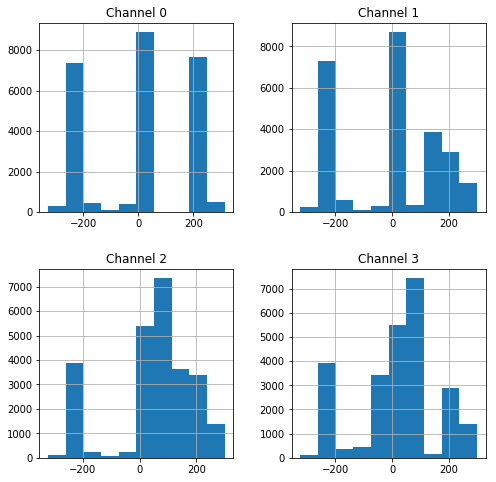

In [14]:
## Histograms of Channels

df.hist(layout=(2,2))
plt.show()

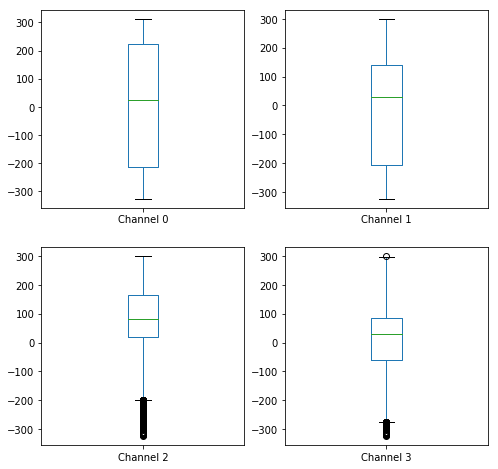

In [15]:
## Boxplots

df.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

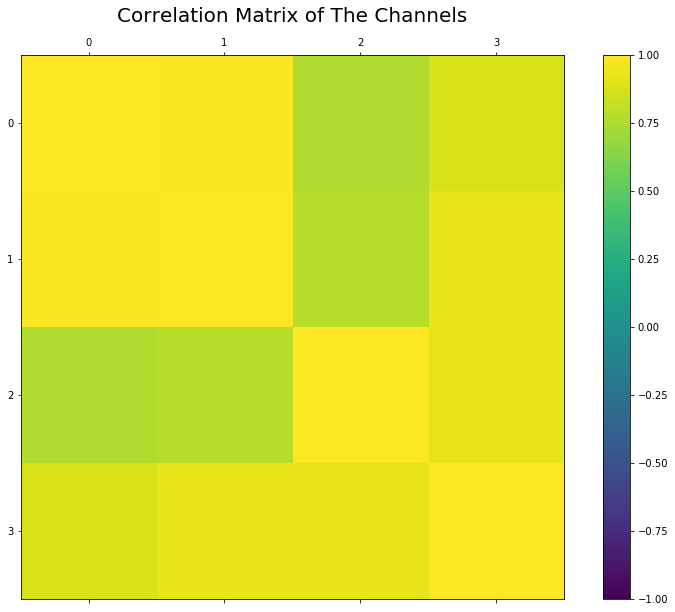

In [16]:
## Correlation Matrix
figure = plt.figure(figsize = (14,10))
axs = figure.add_subplot(111)
corrs = df.corr(method='pearson')
c_axs = axs.matshow(corrs,vmin=-1,vmax=1)
figure.colorbar(c_axs)
axs.set_title('Correlation Matrix of The Channels',fontsize=20)
plt.show()

### Preprocessing

Using Scikit-learn's scale() function

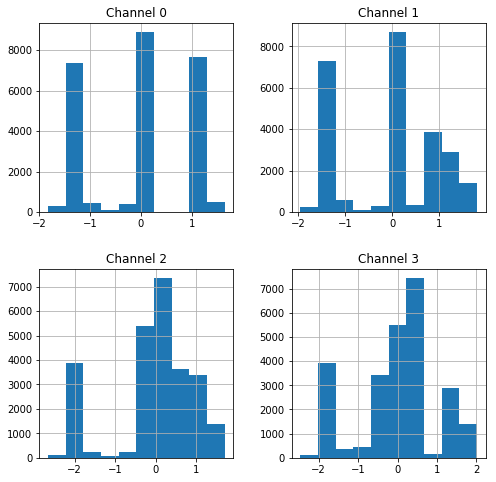

In [17]:
preprocessing.scale(df,copy=False)

## Histograms of preprocessed data
df.hist(layout=(2,2))
plt.show()

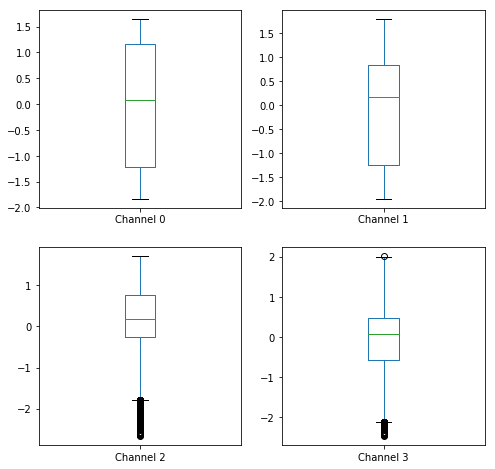

In [18]:
## Boxplots of preprocessed data
df.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

### Data Splitting

Into training and testing sets

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(df,df_target,test_size=0.2)

## Confirming that the dimensions still match
print('xtrain shape: ',xtrain.shape)
print('xtest shape: ',xtest.shape)
print('ytrain shape: ',ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (20524, 4)
xtest shape:  (5132, 4)
ytrain shape:  (20524, 1)
ytest shape:  (5132, 1)


### Building and Training Model

Random Forest Classifier with a K-Fold with 5 folds

In [20]:
seed = 462

start = datetime.now()
model = RandomForestClassifier(random_state = seed)
kfold = KFold(n_splits = 5, random_state = seed, shuffle=True)

model.fit(xtrain,ytrain)
y_pred_test = model.predict(xtest)

cval = cross_val_score(model,xtrain,ytrain,cv=kfold,scoring='accuracy')

accuracy = cval.mean()*100
error = 100-accuracy
score_std = cval.std()*100
precision = precision_score(ytest,y_pred_test,average='macro')*100
recall = recall_score(ytest,y_pred_test,average='macro')*100
f1score = f1_score(ytest,y_pred_test,average='macro')*100

print('Scoring Accuracy: %.2f %%'%(accuracy))
print('Error: %.2f %%'%(error))
print('Scoring Standard Deviation: %.2f %%'%(score_std))
print('Precision: %.2f %%'%(precision))
print('Recall: %.2f %%'%(recall))
print('F1-Score: %.2f %%'%(f1score))
print('Model Training Time: ',(datetime.now() - start))

Scoring Accuracy: 98.76 %
Error: 1.24 %
Scoring Standard Deviation: 0.19 %
Precision: 98.64 %
Recall: 98.63 %
F1-Score: 98.64 %
Model Training Time:  0:00:08.074117


### Model Tuning

In [21]:
params = dict(n_estimators = np.array([50,100,150,200,250]))
model2 = RandomForestClassifier(random_state=seed)
kfold2 = KFold(n_splits=5,random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model2,param_grid=params,scoring = 'accuracy',cv=kfold2)
gridresult = grid.fit(xtrain,ytrain)

print('Best Accuracy Acheived: ', gridresult.best_score_)
print(gridresult.best_params_)


Best Accuracy Acheived:  0.9876728446505355
{'n_estimators': 50}


In [22]:
## Displaying results for each parameter tested
means = []
stdevs = []
means = gridresult.cv_results_['mean_test_score']
stdevs = gridresult.cv_results_['std_test_score']
parameters = gridresult.cv_results_['params']
    
mean = np.array(means)
stdev = np.array(stdevs)
param = np.array(parameters)
tuning_results = np.vstack((mean,stdev,param)).transpose()
df_res = pd.DataFrame(tuning_results,columns = ['Mean Accuracy','Standard Deviation','Parameters'])
df_res = df_res.style.hide_index()
df_res

Mean Accuracy,Standard Deviation,Parameters
0.987673,0.00182138,{'n_estimators': 50}
0.987575,0.00190666,{'n_estimators': 100}
0.987575,0.00202158,{'n_estimators': 150}
0.987429,0.00187913,{'n_estimators': 200}
0.987527,0.00196439,{'n_estimators': 250}


### Final Model Evaluation

In [23]:
model_final = RandomForestClassifier(n_estimators = 50,random_state=seed)
model_final.fit(xtrain,ytrain)
x_pred = model_final.predict(xtest)
accuracy = accuracy_score(ytest,x_pred)
print('Accuracy: ',accuracy)

## Confusion Matrix of Results
CM = confusion_matrix(ytest,x_pred)
print(CM)

Accuracy:  0.9863600935307872
[[1690    9    9]
 [   6 1724   12]
 [   8   26 1648]]
